## Multicollinearity

We will now learn another negative effect that can occur when we shove too many variables into our models. Suppose that we have the following dataset:

In [1]:
bad.df <- read.csv("data/ice-cream-sales-bad.csv")
head(bad.df)

DailyHighTemperatureC,DailySalesContainers,DailyHighTemperatureF
<int>,<int>,<int>
21,19,70
22,10,72
23,24,73
24,57,75
26,49,79
26,77,79


This dataset looks very similar to the ice cream sales dataset that we looked at previously, but it has a key difference: the column `DailyHighTemperatureF` has been added. We can see that `DailyHighTemperatureF` is simply calculated from `DailyHighTemperatureC` using the standard formula:

$$
\mathrm{DailyHighTemperatureF} = \left[\frac{9}{5} \cdot \mathrm{DailyHighTemperatureC}\right] + 32
$$

This means that the column `DailyHighTemperatureF` is *redundant* - it contains no new information, and cannot improve our model. Unfortunately, however, it can most definitely make our model worse. Let's experiment to see how - first, we'll fit a normal model using only our original variable `DailyHighTemperatureC` as a predictor:

In [2]:
model.good <- lm(DailySalesContainers ~ DailyHighTemperatureC, data=bad.df)
summary(model.good)


Call:
lm(formula = DailySalesContainers ~ DailyHighTemperatureC, data = bad.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.432  -7.481  -0.333   8.209  35.174 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -143.8641    10.1889  -14.12   <2e-16 ***
DailyHighTemperatureC    7.8028     0.3033   25.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.84 on 98 degrees of freedom
Multiple R-squared:  0.871,	Adjusted R-squared:  0.8697 
F-statistic: 661.7 on 1 and 98 DF,  p-value: < 2.2e-16


This model looks very reasonable:

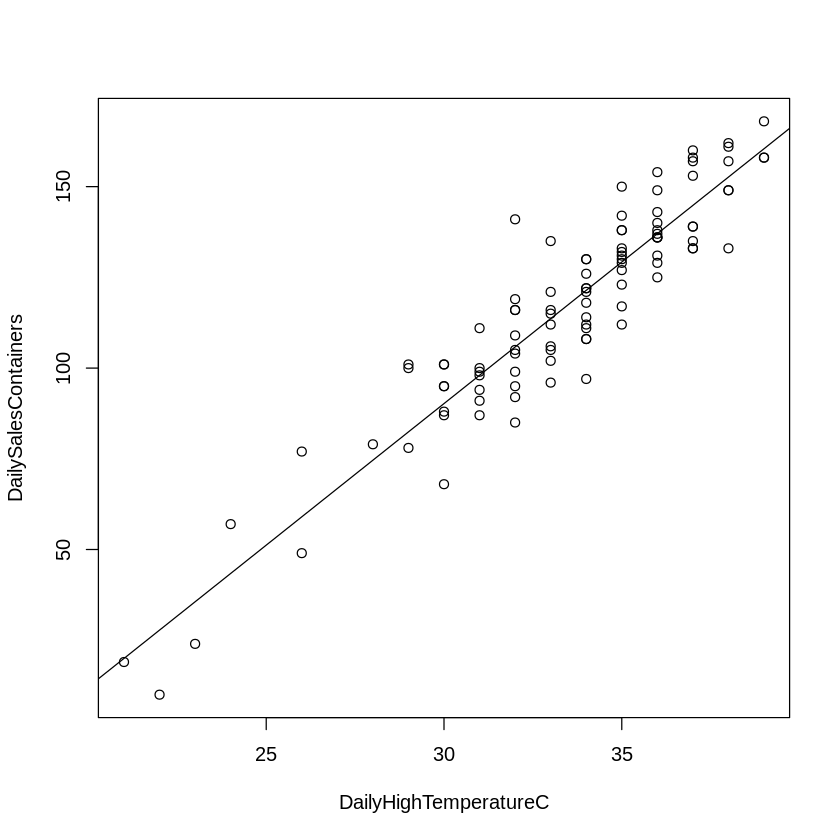

In [3]:
plot(DailySalesContainers ~ DailyHighTemperatureC, data=bad.df)
abline(model.good)

When we add `DailyHighTemperatureF` into our model, the results change dramatically:

In [4]:
model.bad <- lm(DailySalesContainers ~ DailyHighTemperatureC + DailyHighTemperatureF, data=bad.df)
summary(model.bad)


Call:
lm(formula = DailySalesContainers ~ DailyHighTemperatureC + DailyHighTemperatureF, 
    data = bad.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.976  -7.441  -0.407   8.388  34.389 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)           -211.015    126.349  -1.670   0.0981 .
DailyHighTemperatureC    4.047      7.051   0.574   0.5673  
DailyHighTemperatureF    2.090      3.920   0.533   0.5951  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.88 on 97 degrees of freedom
Multiple R-squared:  0.8714,	Adjusted R-squared:  0.8687 
F-statistic: 328.6 on 2 and 97 DF,  p-value: < 2.2e-16


You should take note of the following details:

* The `Std. Error` values associated with both predictors in `model.bad` are MUCH larger than the `Std. Error` value for `DailyHighTemperatureC` in `model.good`. This is because we have confused R by passing it redundant data; since `DailyHighTemperatureC` and `DailyHighTemperatureF` contain the same information, it is very difficult for R to decide how much of each one to include in the model. In fact, there are essentially *infinite combinations* of coefficients for `DailyHighTemperatureC` and `DailyHighTemperatureF` that will yield the same predictions, and R has no way to choose between these combinations. 
* Due to the large `Std. Error` values, the *p*-values of both predictors have been inflated. *Neither predictor is recognizable as statistically significant.*

## What Causes Multicollinearity?

The general cause of multicollinearity problems is described below:

> If any of our predictors is just a linear combination of the other predictors (and thus contains no new information), then including that predictor in our model will cause instability due to multicollinearity

The phrase *linear combination* means that we combine the other predictors by scaling them by any constants that we wish and then adding them together, with an optional additional constant added as well - for example, the variable `x4` given below is a linear combination of `x1`, `x2`, and `x3`:

```
x4 = 5 + 2 * x1 + 3 * x2 + 7 * x3
```

Let's revist our formula above to see how this statement applies to this case:

$$
\mathrm{DailyHighTemperatureF} = \left[\frac{9}{5} \cdot \mathrm{DailyHighTemperatureC}\right] + 32
$$

It is apparent that `DailyHighTemperatureF` is a linear combination of our other predictors, in this case just `DailyHighTemperatureC`.

<span style="color:blue;font-weight:bold">Exercise</span>: Perform the following actions:

* Load the data contained in the file `data/mc-exercise.csv` and store it in the variable `mc.exercise.df` 
* Train a linear model for the prediction of `y` using all `x` columns in `mc.exercise.df` - store your result in the variable `model.first`  
* Using the standard error values from your model, identify which pair of variables are causing your model to suffer from multicollinearity
* Train a new model using all predictor variables `mc.exercise.df` *except* the first column involved in the multicollinearity issue. Store this superior model in the variable `model.second` 

In [13]:
# delete this entire line and replace it with your code

mc.exercise.df <- read.csv('data/mc-exercise.csv')
head(mc.exercise.df)
model.first <- lm(y~., data=mc.exercise.df)

summary(model.first)

model.second <- lm(y ~ x2 + x3 + x4, data=mc.exercise.df)

summary(model.second)

x1,x2,x3,x4,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.812963,5.410015,16.90957,9.707314,88.20583
6.396159,7.615009,19.45785,7.655703,82.00601
8.258071,8.249294,20.80878,8.347248,59.11621
8.186700,8.959776,21.71544,9.170140,81.43213
6.827572,7.799039,18.36827,7.753460,75.64770
8.773109,7.462458,22.93541,5.902640,81.37885



Call:
lm(formula = y ~ ., data = mc.exercise.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.8698  -6.2921   0.3724   7.0340  19.8950 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.2650    10.0415   2.118  0.03681 *  
x1           -0.7660     2.2235  -0.345  0.73122    
x2            2.3915     0.6926   3.453  0.00083 ***
x3            1.1013     1.1017   1.000  0.32004    
x4            3.0433     0.6452   4.717 8.23e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.965 on 95 degrees of freedom
Multiple R-squared:  0.3329,	Adjusted R-squared:  0.3048 
F-statistic: 11.85 on 4 and 95 DF,  p-value: 7.488e-08



Call:
lm(formula = y ~ x2 + x3 + x4, data = mc.exercise.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.2244  -5.9308   0.5036   7.0398  20.3064 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.8307     8.9130   2.562 0.011978 *  
x2            2.3938     0.6894   3.472 0.000775 ***
x3            0.7403     0.3389   2.184 0.031380 *  
x4            3.0379     0.6421   4.731 7.67e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.919 on 96 degrees of freedom
Multiple R-squared:  0.3321,	Adjusted R-squared:  0.3112 
F-statistic: 15.91 on 3 and 96 DF,  p-value: 1.789e-08


In [14]:
correct.mc.exercise.df <- read.csv("data/mc-exercise.csv")
check.variable.value("mc.exercise.df", correct.mc.exercise.df)
correct.model.first <- lm(y ~ x1 + x2 + x3 + x4, data=mc.exercise.df)
check.variable.definition("model.first") 
assert.true(all(coefficients(model.first) == coefficients(correct.model.first)), "Did you set <code>model.first</code> correctly?")
correct.model.second <- lm(y ~ x2 + x3 + x4, data=mc.exercise.df)
check.variable.definition("model.second") 
assert.true(all(coefficients(model.second) == coefficients(correct.model.second)), "Did you set <code>model.second</code> correctly?")
success()

Correct!